In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=5, n_informative=5, n_targets=1,  noise=0.01)

In [2]:
X.shape

(500, 5)

In [3]:
y.shape

(500,)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

# Gradient boosting with decision trees

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
tree_reg_1 = DecisionTreeRegressor(max_depth=2)

In [8]:
tree_reg_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

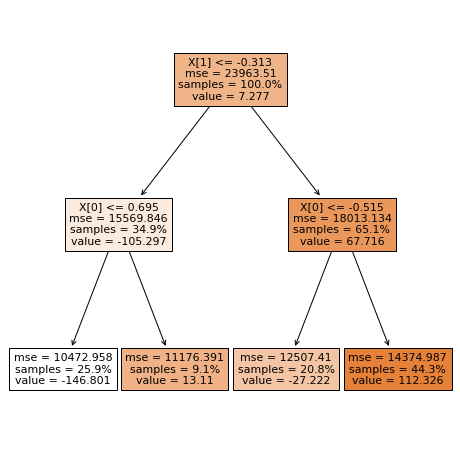

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

tree.plot_tree(tree_reg_1, filled=True, proportion=True);

In [10]:
y2 = y_train - tree_reg_1.predict(x_train)

In [11]:
tree_reg_2 = DecisionTreeRegressor(max_depth=2)

In [12]:
tree_reg_2.fit(x_train, y2)

DecisionTreeRegressor(max_depth=2)

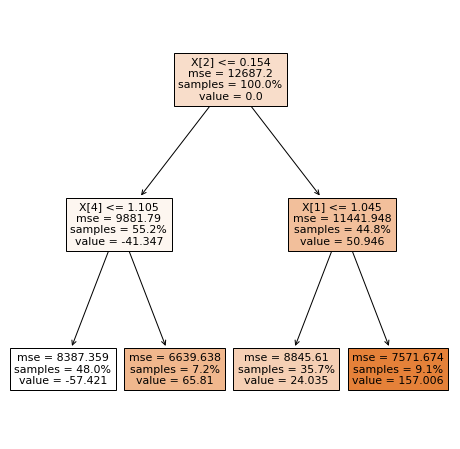

In [13]:
tree.plot_tree(tree_reg_2, filled=True, proportion=True);

In [14]:
y3 = y2 - tree_reg_2.predict(x_train)

In [15]:
tree_reg_3 = DecisionTreeRegressor(max_depth=2)

In [16]:
tree_reg_3.fit(x_train, y3)

DecisionTreeRegressor(max_depth=2)

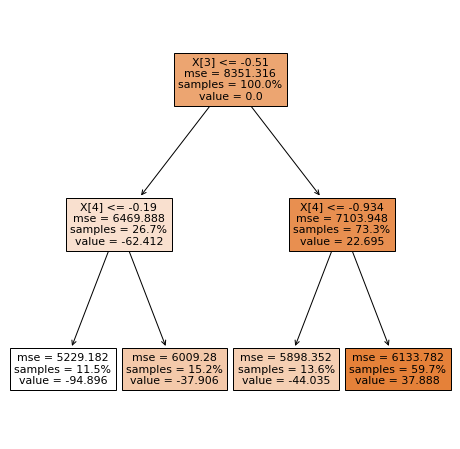

In [17]:
tree.plot_tree(tree_reg_3, filled=True, proportion=True);

In [18]:
y4 = y3 - tree_reg_3.predict(x_train)

In [19]:
tree_reg_4 = DecisionTreeRegressor(max_depth=2)

In [20]:
tree_reg_4.fit(x_train, y4)

DecisionTreeRegressor(max_depth=2)

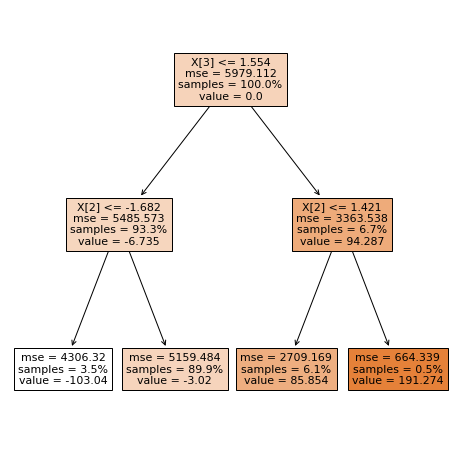

In [21]:
tree.plot_tree(tree_reg_4, filled=True, proportion=True);

# Building the additive model

In [22]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg_1, tree_reg_2, tree_reg_3, tree_reg_4))

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mean_absolute_error(y_pred, y_test)

68.5256114244789

In [25]:
mean_squared_error(y_pred, y_test)

6884.01450010129

In [26]:
mean_absolute_error(tree_reg_1.predict(X_test), y_test)

85.65981056772631

In [27]:
mean_squared_error(tree_reg_1.predict(X_test), y_test)

11105.381936958454

# using sklearn

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)

In [30]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mean_absolute_error(y_pred, y_test)

25.657780278081695

In [33]:
mean_squared_error(y_pred, y_test)

1292.5743107975009

# staged_predict

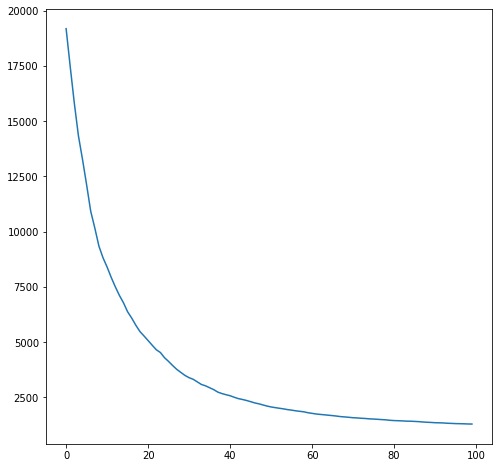

In [34]:
loss = []

for i, y_pred in enumerate(model.staged_predict(X_test)):
    loss.append(model.loss_(y_test, y_pred))

plt.plot(loss)

# Regularization

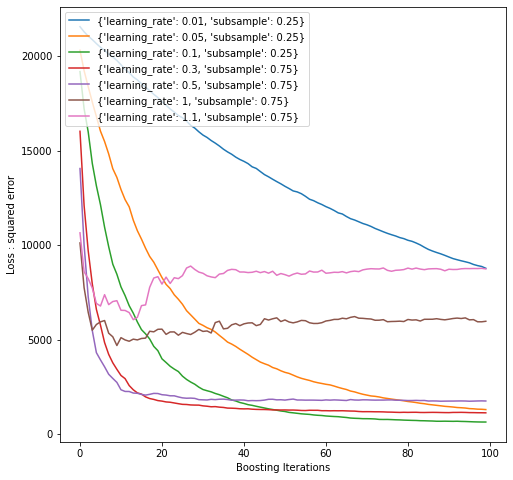

In [35]:
param_list = [{"learning_rate": 0.01, "subsample": 0.25},
            {"learning_rate": 0.05, "subsample": 0.25}, 
            {"learning_rate": 0.1, "subsample": 0.25}, 
            {"learning_rate": 0.3, "subsample": 0.75},
            {"learning_rate": 0.5, "subsample": 0.75},
            {"learning_rate": 1, "subsample": 0.75},
            {"learning_rate": 1.1, "subsample": 0.75},]

for i in range(0, len(param_list)):
    model = GradientBoostingRegressor(**param_list[i])
    model.fit(x_train, y_train)
    loss_test = []
    for j, y_pred in enumerate(model.staged_predict(X_test)):
        loss_test.append(model.loss_(y_test, y_pred))

    plt.plot(loss_test, label = str(param_list[i]))

plt.legend(loc="upper left")
plt.xlabel("Boosting Iterations")
plt.ylabel("Loss : squared error")
plt.show()